# Rede neural: classificação básica (Fashion MNIST)

In [1]:
#Este notebook é utilizado para o desenvolvimento do trabalho prático do bootcamp de MLE

### Importando as bibliotecas

In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


### Importando a base de dados Fashion MNIST

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Label	Classe

0	Camisetas/Top (T-shirt/top)

1	Calça (Trouser)

2	Suéter (Pullover)

3	Vestidos (Dress)

4	Casaco (Coat)

5	Sandálias (Sandal)

6	Camisas (Shirt)

7	Tênis (Sneaker)

8	Bolsa (Bag)

9	Botas (Ankle boot)

Explore os dados

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Pré-processando os dados

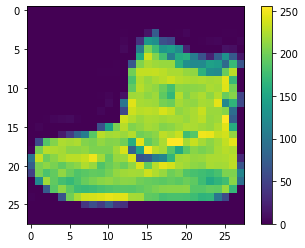

In [9]:
# Plot da primeira peça da base de treino
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

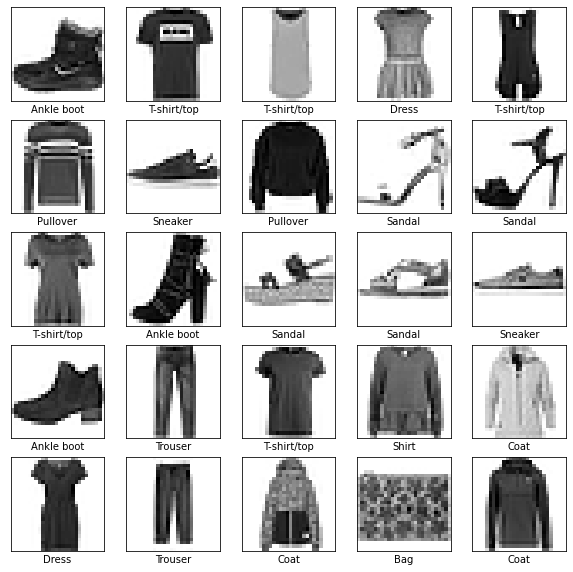

In [11]:
# As primeiras 25 imagens do conjunto de treinamento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construindo o modelo

#### Montando as camadas

In [12]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### Compilando o modelo

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Treinando o modelo

In [14]:
# Realizando treinamento do modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4972 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3354 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2933 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2771 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2654 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2550 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2468 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

### Avaliando a acurácia

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3359 - accuracy: 0.8820

Test accuracy: 0.8820000290870667


### Fazendo predições

In [16]:
# Fazendo as predições com o dataset de teste
predictions = model.predict(test_images)
# Selecionando a a primeira imagem do teste
predictions[0]

array([6.2058427e-07, 1.3508265e-09, 1.6337536e-07, 5.8287841e-12,
       1.2706001e-08, 9.6164556e-05, 1.8119481e-07, 7.9890387e-03,
       3.3980623e-06, 9.9191040e-01], dtype=float32)

In [17]:
# A classe com maior probabilidade da primeira imagem
np.argmax(predictions[0])

9

In [18]:
# Função para plot da imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Função para plot com as probabilidades
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

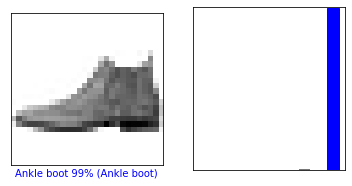

In [19]:
# Predição correta
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

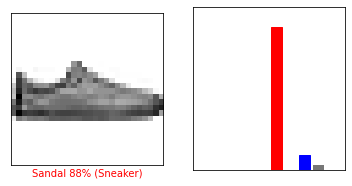

In [20]:
# Predição incorreta
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

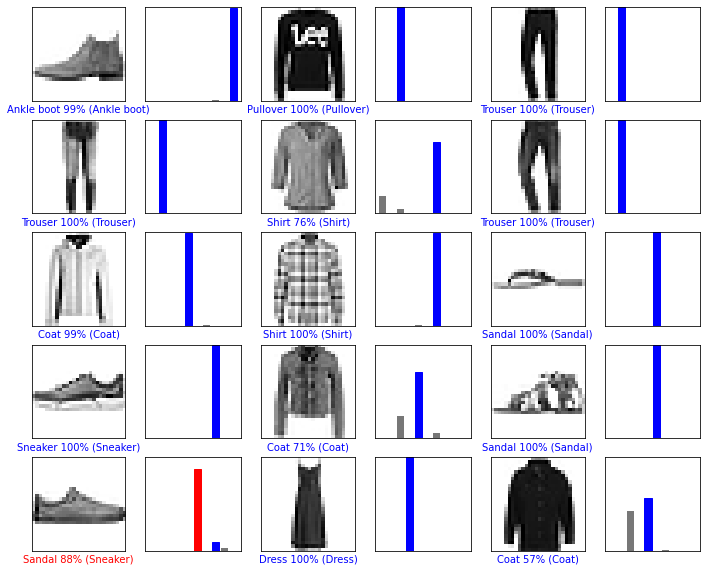

In [21]:
# Labels preditas corretamente são azuis e as predições erradas são vermelhas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [22]:
# Selecionando apenas uma imagem test dataset.
img = test_images[0]
print('Shape da imagem de exemplo:', img.shape)
# Adiciona a imagem em um batch que possui um só membro, formato para entrada na RN
img = (np.expand_dims(img,0))
print('Imagem no formato de entrada para a Rede Neural:', img.shape)
predictions_single = model.predict(img)
print('Array com as probabilidades de cada classe:\n', predictions_single)

Shape da imagem de exemplo: (28, 28)
Imagem no formato de entrada para a Rede Neural: (1, 28, 28)
Array com as probabilidades de cada classe:
 [[6.2058541e-07 1.3508239e-09 1.6337536e-07 5.8287841e-12 1.2706049e-08
  9.6164556e-05 1.8119498e-07 7.9890387e-03 3.3980621e-06 9.9191040e-01]]


A classe prevista é: 9


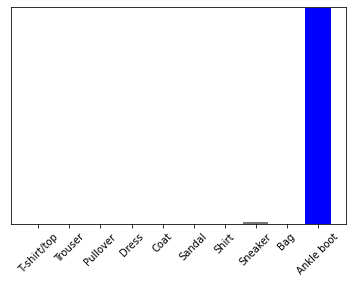

In [23]:
print('A classe prevista é:', np.argmax(predictions_single[0]))
# Plote com as probabilidades de cada classe
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)